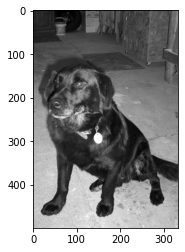

In [3]:
#https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2
import numpy as np #array operations
import matplotlib.pyplot as plt
import os
import cv2 #image operation

DATADIR = "/Users/kamakshibanavalikar/Projects/CatDog/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    # Syntax: os.path.join(path, *paths) 
    ##*paths: It represents the path components to be joined.
    path= os.path.join(DATADIR, category) #path to cats or dogs file of images
    for img in os.listdir(path): #itering throw all the images 
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #converting to array (gray scale)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
#pixel value of the 2D array
print(img_array)
print(img_array.shape)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]
(500, 333)


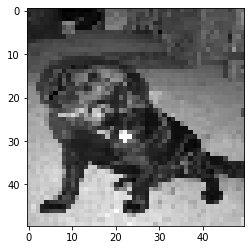

In [8]:
#since all the images are in potrait or landscape. we can normalise by keep a standard size

IMG_SIZE = 50

NEW_ARRAY = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE) )
plt.imshow(NEW_ARRAY, cmap = "gray")
plt.show()


In [14]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR, category) #path to cats or dogs file of images
        class_num = CATEGORIES.index(category) #binary classification of 0 or 1 for dog and cat
        for img in os.listdir(path): #itering throw all the images 
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #converting to array (gray scale)
                NEW_ARRAY = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE) )
                training_data.append([NEW_ARRAY ,class_num ]) #appending in the list 
            except Exception as e:
                pass
        
create_training_data()   

In [15]:
print(len(training_data))

24946


In [ ]:
#shuffle the data
import random

random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [21]:
X=[] #features
y=[] #labels

In [22]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
#X cant be fed into nn as list so convert to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 because its grayscale


In [24]:
#save your work

import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [25]:
pickle_in =open("X.pickle","rb")
X= pickle.load(pickle_in)

In [26]:
X[1]

array([[[106],
        [ 94],
        [118],
        ...,
        [135],
        [123],
        [125]],

       [[ 75],
        [ 89],
        [155],
        ...,
        [165],
        [134],
        [122]],

       [[114],
        [124],
        [112],
        ...,
        [166],
        [146],
        [122]],

       ...,

       [[120],
        [ 40],
        [ 53],
        ...,
        [112],
        [ 61],
        [ 40]],

       [[ 69],
        [ 43],
        [ 76],
        ...,
        [138],
        [ 39],
        [ 90]],

       [[ 58],
        [ 47],
        [ 81],
        ...,
        [ 89],
        [ 55],
        [119]]], dtype=uint8)